In [1]:
# import libraries
import pandas as pd
# set no limits on columns view
pd.set_option('display.max_columns', None)
# set no limits on rows view
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Cleaning the Questions.xlsx file
Remove all the columns that have all the values as 0 and fix the rows that have the values NaN.

In [7]:
# read the xlsx file
df = pd.read_excel('/Users/lucian/Documents/Thesis/FoF-Analysis-Viz/dataset/Questions.xlsx')

# drop the columns that have the title "Unnamed"
df = df.drop(df.filter(regex='Unnamed'), axis=1)
# drop the last column
df = df.drop(df.columns[-1], axis=1)
# remove the second row
df = df.drop(df.index[1])
# remove the first row
#df = df.drop(df.index[0])

# remove the colomuns that have all the values 0
columns_with_zero = [       
       'Heart Attack', 
       'Stroke Cerebral Vascular Disease',
       'Any other heart trouble',
       'Parkinsons Disease', 
       'Alzheimers Disease', 
       'Dementia',
       'Serious Memory Impairment', 
       'Reach forward', 
       'Hoop walk', 
       'Mat walk', 
       'TUG walk',
      ]
df = df.drop(columns_with_zero, axis=1)

# remove the columns that are not needed
columns_not_needed = [
       #! TO REMOVE 
       'Comments on the falls',
       'Fallers/Non-fallers                (5 past years)',
       'Any hazards that contributed to fall?',
       'Where?',
       'Field notes',
]
df = df.drop(columns_not_needed, axis=1)

# NOTE:
    #'Grip strenth ', has 'Not done' string inside the column
    # NOTE: has NaN values
        # 'IPAQ  - Duration/Moderate activity ' 
        # 'IPAQ  - Duration /Vigorous activity 
        # '3 Preparing simple meals'
        # 'Where?'
    # 'Was fall accidental?' has 2 values "1 and 2"
# replace NaN values with 0 
df = df.fillna(0)
# replace 'Not done' with 0
df = df.replace('Not done', 0)

#NOTE: Patient 5 replied with 2 choices for the questions:
    # 'Was fall accidental?'
    # 'Where did fall occur?'

#TODO: What should i do with the problem above?

df

OSError: Cannot save file into a non-existent directory: '/Users/lucian/Documents/Thesis/FoF-Analysis-Viz/dataset-clean'

### Visualize the data from the cleaned file
Visualize the data from the cleaned file using the following libraries:
* matplotlib
* seaborn

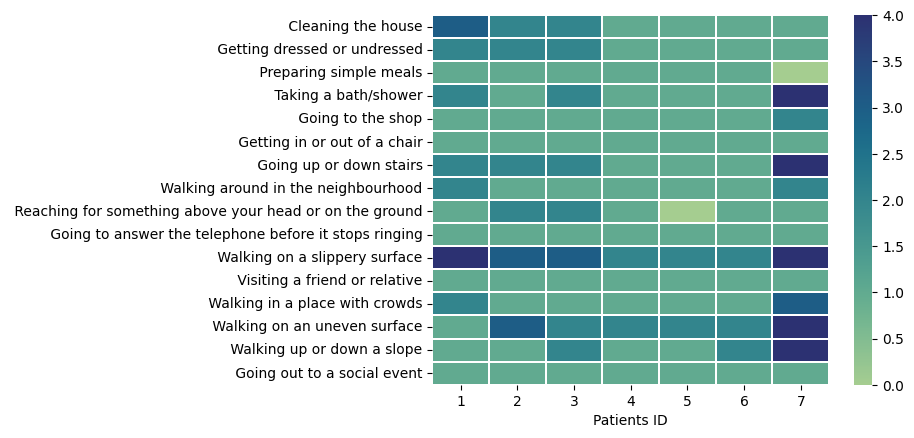

In [3]:
# get specific columns from the dataframe
patients = df['Participant_ID']
patients_concern = df[[
    '1 Cleaning the house',
    '2 Getting dressed or undressed', '3 Preparing simple meals',
    '4 Taking a bath/shower', '5 Going to the shop',
    '6 Getting in or out of a chair', '7 Going up or down stairs',
    '8 Walking around in the neighbourhood',
    '9 Reaching for something above your head or on the ground',
    '10 Going to answer the telephone before it stops ringing',
    '11 Walking on a slippery surface', '12 Visiting a friend or relative',
    '13 Walking in a place with crowds', '14 Walking on an uneven surface',
    '15 Walking up or down a slope', '16 Going out to a social event',
]]
# remove the number from each column name
patients_concern.columns = patients_concern.columns.str.replace('\d+', '', regex=True)
patients_concern = patients_concern.set_index(patients)
# invert the dataframe
patients_concern = patients_concern.T
# # make a sns heatmap
ax = sns.heatmap(patients_concern, cmap="crest", linewidth=.3)
ax.set(xlabel="Patients ID", ylabel="")
plt.show()

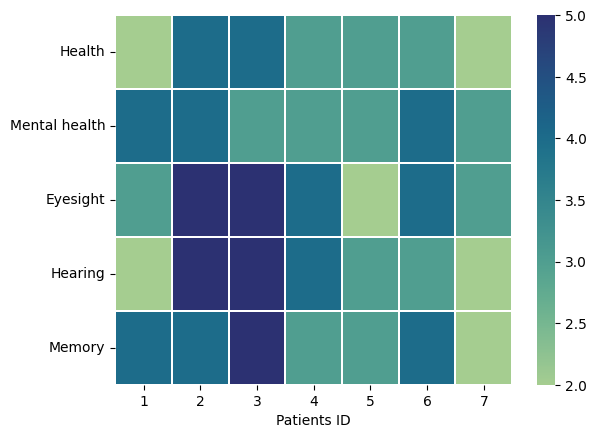

In [5]:
patients_status = df[[
    'Health','Mental health', 'Eyesight', 'Hearing', 'Memory'
]]
patients_status.columns = patients_status.columns.str.replace('\d+', '', regex=True)
patients_status = patients_status.set_index(patients)
# invert the dataframe
patients_status = patients_status.T
# # make a sns heatmap
ax = sns.heatmap(patients_status, cmap="crest", linewidth=.3)
ax.set(xlabel="Patients ID", ylabel="")
plt.show()